In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Türkçe karakter uyumu için
plt.rcParams['font.family'] = 'Arial'

# Veri setini yükle
df = pd.read_csv("../data/enerji_optimizasyon_veri_seti.csv")

# İlk 5 satırı görüntüle
df.head()


,Tarih,Saat,Üretim_Miktarı_adet,Hava_Sıcaklığı_C,Hammadde_Sıcaklığı_C,Enerji_Tüketimi_kWh
0,2025-06-01,0,515,14.7,25.7,40.78
1,2025-06-01,1,519,14.9,27.2,39.66
2,2025-06-01,2,536,17.4,26.7,38.76
3,2025-06-01,3,578,14.1,21.5,39.16
4,2025-06-01,4,556,20.6,29.3,39.10


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns



C:\Users\monster\AppData\Local\Temp\ipykernel_15192\1497528720.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Saat", y="Enerji_Tüketimi_kWh", ci=None)


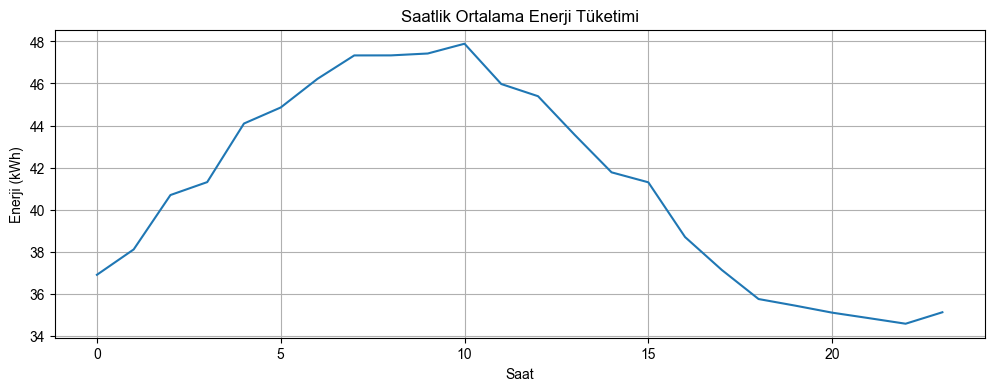

In [4]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=df, x="Saat", y="Enerji_Tüketimi_kWh", ci=None)
plt.title("Saatlik Ortalama Enerji Tüketimi")
plt.xlabel("Saat")
plt.ylabel("Enerji (kWh)")
plt.grid(True)
plt.show()


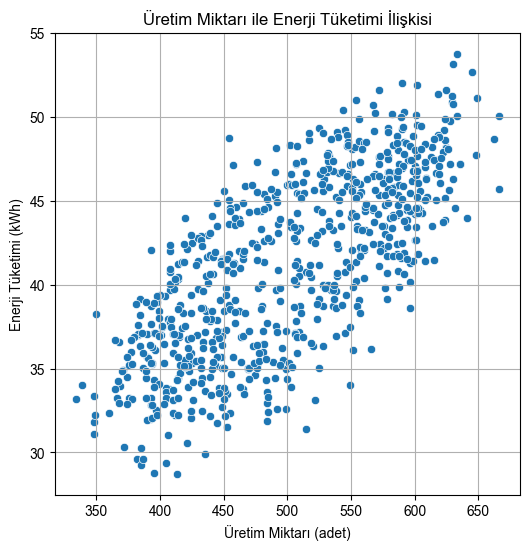

In [5]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x="Üretim_Miktarı_adet", y="Enerji_Tüketimi_kWh")
plt.title("Üretim Miktarı ile Enerji Tüketimi İlişkisi")
plt.xlabel("Üretim Miktarı (adet)")
plt.ylabel("Enerji Tüketimi (kWh)")
plt.grid(True)
plt.show()



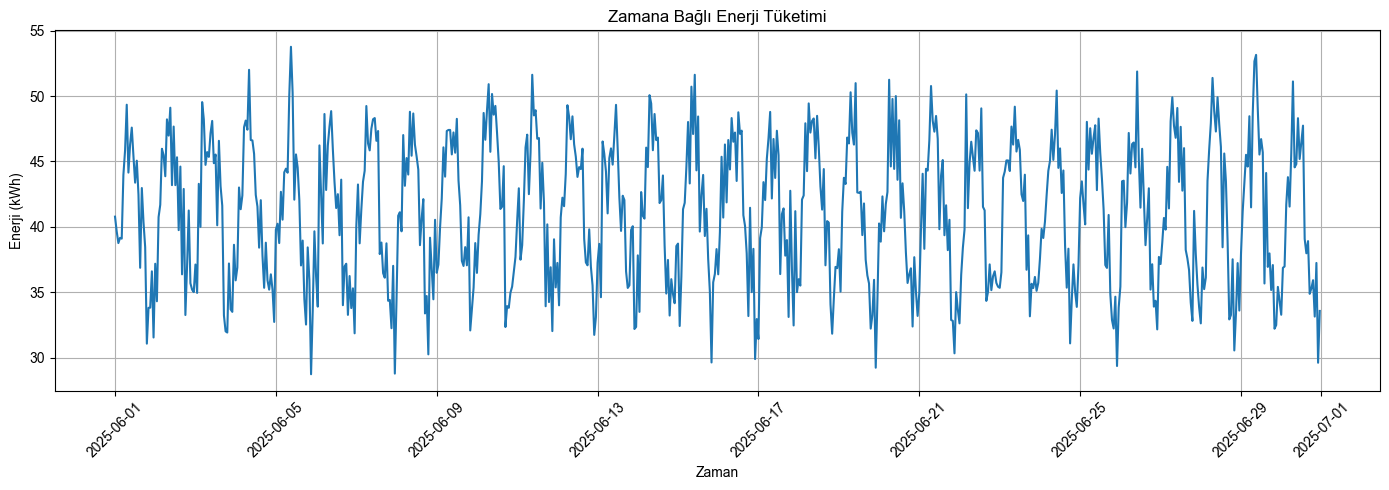

In [6]:
# Zaman sütununu oluştur
df["Zaman"] = pd.to_datetime(df["Tarih"]) + pd.to_timedelta(df["Saat"], unit="h")

# Zaman serisi grafiği
plt.figure(figsize=(14, 5))
sns.lineplot(data=df, x="Zaman", y="Enerji_Tüketimi_kWh")
plt.title("Zamana Bağlı Enerji Tüketimi")
plt.xlabel("Zaman")
plt.ylabel("Enerji (kWh)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# X ve y'yi ayır
X = df[["Üretim_Miktarı_adet", "Hava_Sıcaklığı_C", "Hammadde_Sıcaklığı_C"]]
y = df["Enerji_Tüketimi_kWh"]

# Veriyi eğitim ve test olarak ayır (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
!pip install scikit-learn


   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   --- ------------------------------------ 1.0/10.7 MB 7.2 MB/s eta 0:00:02
   --------- ------------------------------ 2.6/10.7 MB 7.9 MB/s eta 0:00:02
   -------------- ------------------------- 3.9/10.7 MB 7.6 MB/s eta 0:00:01
   ------------------------- -------------- 6.8/10.7 MB 9.1 MB/s eta 0:00:01
   ---------------------------------- ----- 9.2/10.7 MB 9.7 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 9.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.3 MB ? eta -:--:--
   -- ------------------------------------- 2.1/41.3 MB 10.7 MB/s eta 0:00:04
   ---- ----------------------------------- 4.2/41.3 MB 10.9 MB/s eta 0:00:04
   ------ --------------------------------- 6.6/41.3 MB 11.2 MB/s eta 0:00:04
   -------- ------------------------------- 8.7/41.3 MB 11.0 MB/s eta 0:00:03
   ---------- ----------------------------- 11.0/41.3 MB 10.9 MB/s eta 0:00:03
   ---

In [9]:
import sklearn
print("scikit-learn yüklü 🚀")


scikit-learn yüklü 🚀


In [11]:
from sklearn.model_selection import train_test_split

X = df[["Üretim_Miktarı_adet", "Hava_Sıcaklığı_C", "Hammadde_Sıcaklığı_C"]]
y = df["Enerji_Tüketimi_kWh"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
# Test verisiyle tahmin yap
y_pred = model.predict(X_test)

# Değerlendirme metriklerini hesapla
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE (Ortalama Mutlak Hata): {mae:.2f}")
print(f"MSE (Ortalama Kare Hata): {mse:.2f}")
print(f"R2 Skoru: {r2:.2f}")


MAE (Ortalama Mutlak Hata): 1.52
MSE (Ortalama Kare Hata): 3.66
R2 Skoru: 0.87


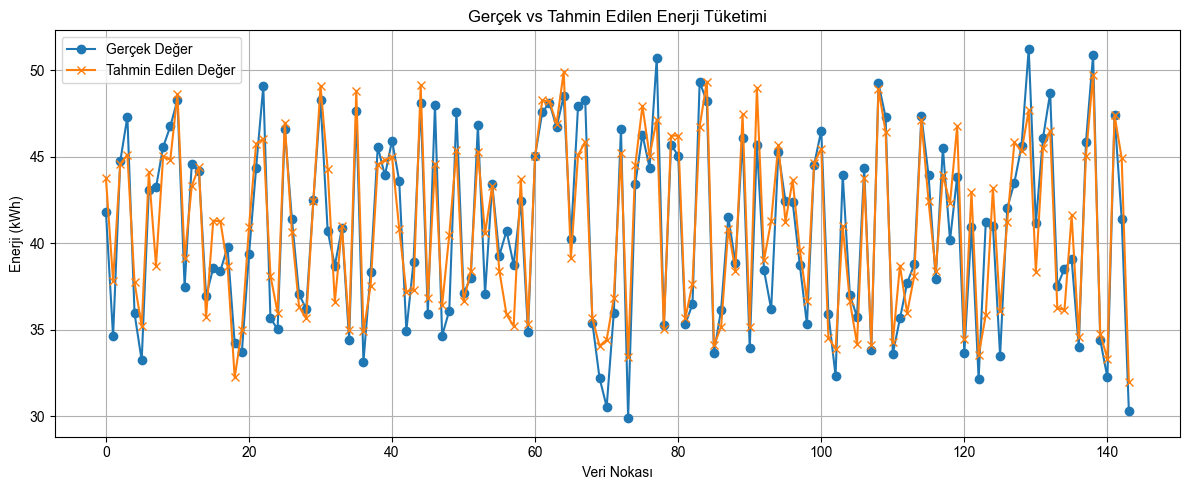

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label="Gerçek Değer", marker='o')
plt.plot(y_pred, label="Tahmin Edilen Değer", marker='x')
plt.title("Gerçek vs Tahmin Edilen Enerji Tüketimi")
plt.xlabel("Veri Nokası")
plt.ylabel("Enerji (kWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
# Örnek bir veriyle enerji tüketimi tahmini
ornek_veri = np.array([[500, 32, 35]])  # üretim, hava sıcaklığı, hammadde sıcaklığı
tahmin = model.predict(ornek_veri)
print(f"Tahmin Edilen Enerji Tüketimi (kWh): {tahmin[0]:.2f}")


Tahmin Edilen Enerji Tüketimi (kWh): 42.91


C:\Users\monster\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
# Katsayılar (feature importance)
feature_names = X.columns
coefficients = model.coef_

for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.2f}")


Üretim_Miktarı_adet: 0.05
Hava_Sıcaklığı_C: 0.26
Hammadde_Sıcaklığı_C: 0.14


In [18]:

ornek_df = pd.DataFrame([[500, 32, 35]], columns=["Üretim_Miktarı_adet", "Hava_Sıcaklığı_C", "Hammadde_Sıcaklığı_C"])
tahmin = model.predict(ornek_df)
print(f"Tahmin Edilen Enerji Tüketimi (kWh): {tahmin[0]:.2f}")


Tahmin Edilen Enerji Tüketimi (kWh): 42.91


In [19]:
import pickle

# Modeli dosyaya kaydet
with open("enerji_tahmin_modeli.pkl", "wb") as dosya:
    pickle.dump(model, dosya)

print("Model başarıyla kaydedildi ✅")


Model başarıyla kaydedildi ✅


In [20]:
!pip install xgboost
!pip install scikit-learn


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
    --------------------------------------- 2.4/150.0 MB 9.0 MB/s eta 0:00:17
    --------------------------------------- 3.7/150.0 MB 7.8 MB/s eta 0:00:19
   - -------------------------------------- 5.2/150.0 MB 8.0 MB/s eta 0:00:19
   - -------------------------------------- 6.8/150.0 MB 8.1 MB/s eta 0:00:18
   -- ------------------------------------- 8.4/150.0 MB 7.9 MB/s eta 0:00:18
   -- ------------------------------------- 10.0/150.0 MB 7.8 MB/s eta 0:00:19
   --- ------------------------------------ 11.5/150.0 MB 7.8 MB/s eta 0:00:18
   --- ------------------------------------ 13.4/150.0 MB 7.9 MB/s eta 0:00:18
   ---- ----------------------------------- 15.2/150.0 MB 8.0 MB/s eta 0:00:17
   ---- ----------------------------------- 17.0/150.0 MB 8.1 MB/s eta 0:00:17
   ----- ---------------------------------- 18.9/150.0 MB 8.3 MB/s eta 0:

In [21]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "R2": r2
    }

# Sonuçları yazdır
for model_name, metrics in results.items():
    print(f"📌 {model_name}")
    print(f"  🔸 MAE : {metrics['MAE']:.2f}")
    print(f"  🔸 MSE : {metrics['MSE']:.2f}")
    print(f"  🔸 R2  : {metrics['R2']:.2f}")
    print("-" * 30)


📌 Linear Regression
  🔸 MAE : 1.52
  🔸 MSE : 3.66
  🔸 R2  : 0.87
------------------------------
📌 Random Forest
  🔸 MAE : 1.67
  🔸 MSE : 4.82
  🔸 R2  : 0.83
------------------------------
📌 XGBoost
  🔸 MAE : 1.94
  🔸 MSE : 6.32
  🔸 R2  : 0.78
------------------------------


In [22]:
# Yeni öznitelikleri oluştur
df["Sıcaklık_Farkı_C"] = df["Hammadde_Sıcaklığı_C"] - df["Hava_Sıcaklığı_C"]
df["Ortalama_Sıcaklık_C"] = (df["Hava_Sıcaklığı_C"] + df["Hammadde_Sıcaklığı_C"]) / 2
df["Enerji_Birim_Uretim"] = df["Enerji_Tüketimi_kWh"] / df["Üretim_Miktarı_adet"]


In [23]:
X = df[["Üretim_Miktarı_adet", "Hava_Sıcaklığı_C", "Hammadde_Sıcaklığı_C",
        "Sıcaklık_Farkı_C", "Ortalama_Sıcaklık_C"]]
y = df["Enerji_Tüketimi_kWh"]

# Veriyi ayır
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42)
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {"MAE": mae, "MSE": mse, "R2": r2}

# Sonuçları yazdır
for model_name, metrics in results.items():
    print(f"\n📌 {model_name}")
    print(f"🔸 MAE : {metrics['MAE']:.2f}")
    print(f"🔸 MSE : {metrics['MSE']:.2f}")
    print(f"🔸 R2  : {metrics['R2']:.2f}")
    print("-" * 30)



📌 Linear Regression
🔸 MAE : 1.52
🔸 MSE : 3.66
🔸 R2  : 0.87
------------------------------

📌 Random Forest
🔸 MAE : 1.65
🔸 MSE : 4.64
🔸 R2  : 0.84
------------------------------

📌 XGBoost
🔸 MAE : 1.90
🔸 MSE : 5.76
🔸 R2  : 0.80
------------------------------


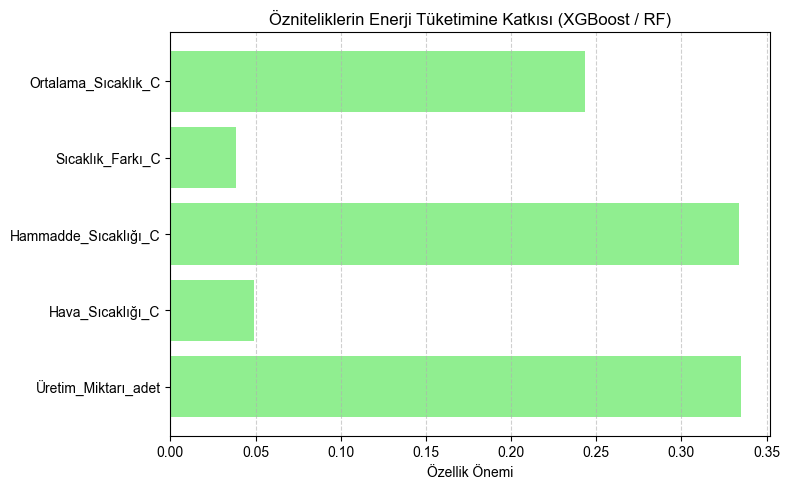

In [26]:
import matplotlib.pyplot as plt

# Öznitelik önemlerini al
importances = model.feature_importances_
feature_names = X.columns

# Görselleştir
plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances, color='lightgreen')
plt.xlabel("Özellik Önemi")
plt.title("Özniteliklerin Enerji Tüketimine Katkısı (XGBoost / RF)")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
import joblib

# Eğittiğin model değişkeni neyse onu kullan (örneğin: model, rf_model vs.)
joblib.dump(model, "../results/best_model.pkl")




Model başarıyla kaydedildi!
